# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

In [213]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from fake_useragent import UserAgent
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [3]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [4]:
trending_devs = BeautifulSoup(requests.get(url).content, 'html.parser')
trending_devs



<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-b92e9647318f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [5]:
dev_names = [BeautifulSoup(str(tag), 'html.parser').find_all('a')[0].string.strip() for tag in trending_devs.find_all('h1', {'class': 'h3 lh-condensed'})]

In [6]:
print(len(dev_names))
dev_names

25


['Yudong Jin',
 'Vaibhav Srivastav',
 'Arseny Kapoulkine',
 'Brian Smith',
 'Andrew McKnight',
 'Laurent Mazare',
 'Radamés Ajna',
 'Nikita Sobolev',
 'lllyasviel',
 'Vectorized',
 'Stephen Haberman',
 'Norman Maurer',
 'Stan Girard',
 'Andreas Thomas',
 'Stella Laurenzo',
 'Jake Vanderplas',
 'Chris Villa',
 'Stephen Celis',
 "John O'Reilly",
 'Chris Banes',
 'Felix Yan',
 'Jinzhe Zeng',
 'George Hotz',
 'Miguel Ángel Durán',
 'Felix Kratz']

#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [31]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [32]:
github_repos = BeautifulSoup(requests.get(url).content, 'html.parser')
github_repos


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-b92e9647318f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

In [35]:
h2_h3 = github_repos.find_all('h2', {'class': 'h3 lh-condensed'})
h2_h3

[<h2 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":622894885,"originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="3422e1bf426c570bee0c9a1edbb3930fc46457983d3c84a3cad2ae8c76c6411e" data-view-component="true" href="/AILab-CVC/VideoCrafter">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a

In [49]:
[BeautifulSoup(str(tag), 'html.parser').find_all('span')[0].string.replace('/','').strip() for tag in h2_h3]

['AILab-CVC',
 'jianchang512',
 'Pythagora-io',
 'hiroi-sora',
 'oobabooga',
 'spack',
 'safevideo',
 'tigerlab-ai',
 'kedro-org',
 'iterative',
 'spdustin',
 'dataelement',
 'streamlit',
 'PromptEngineer48',
 'langchain-ai',
 'pydantic',
 'LorenEteval',
 'Kav-K',
 'WilliamStar007',
 'RekhuGopal',
 'shadowsocks',
 'hiyouga',
 'helblazer811',
 'continue-revolution',
 'noamgat']

#### Display all the image links from Walt Disney wikipedia page.

In [50]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [53]:
img = BeautifulSoup(requests.get(url).content,'html.parser').find_all('img')

In [61]:
img_urls = [s.replace('src="','') for s in re.findall('src="[^"]*',str(img))]
img_urls[:10]

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/22

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [62]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python_of_Byzantium' 

In [65]:
pybiz = BeautifulSoup(requests.get(url).content,'html.parser')
pybiz

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Python of Byzantium - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

In [71]:
all_links = [r.replace('href="','') for r in re.findall('href="[^"]*',str(pybiz.find_all('a',{'href': True})))]
all_links[:10]

['#bodyContent',
 '/wiki/Main_Page',
 '/wiki/Wikipedia:Contents',
 '/wiki/Portal:Current_events',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:About',
 '//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en',
 '/wiki/Help:Contents',
 '/wiki/Help:Introduction']

In [77]:
absolute_links = re.findall('https:[^"]*', '"'.join(s for s in all_links))
absolute_links

['https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en',
 'https://fr.wikipedia.org/wiki/Python_de_Byzance',
 'https://it.wikipedia.org/wiki/Pitone_di_Bisanzio',
 'https://nn.wikipedia.org/wiki/Mal:Fortattar-greskantikkspire',
 'https://www.wikidata.org/wiki/Special:EntityPage/Q15723#sitelinks-wikipedia',
 'https://www.wikidata.org/wiki/Special:EntityPage/Q15723',
 'https://en.wikipedia.org/w/index.php?title=Python_of_Byzantium&amp;action=edit',
 'https://en.wikipedia.org/w/index.php?title=Python_of_Byzantium&amp;oldid=1164945466',
 'https://foundation.wikimedia.org/wiki/Special:MyLanguage/Policy:Privacy_policy',
 'https://foundation.wikimedia.org/wiki/Special:MyLanguage/Policy:Universal_Code_of_Conduct',
 'https://developer.wikimedia.org',
 'https://stats.wikimedia.org/#/en.wikipedia.org',
 'https://foundation.wikimedia.org/wiki/Special:MyLanguage/Policy:Cookie_statement',
 'https:/

#### Find the number of titles that have changed in the United States Code since its last release point.

In [78]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [81]:
titles = BeautifulSoup(requests.get(url,'html.parser').content)
titles

<?xml version='1.0' encoding='UTF-8' ?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=8" http-equiv="X-UA-Compatible"/>
<meta content="no-cache" http-equiv="pragma"/><!-- HTTP 1.0 -->
<meta content="no-cache,must-revalidate" http-equiv="cache-control"/><!-- HTTP 1.1 -->
<meta content="0" http-equiv="expires"/>
<link href="/javax.faces.resource/favicon.ico.xhtml?ln=images" rel="shortcut icon"/><link href="/javax.faces.resource/cssLayout.css.xhtml?ln=css" rel="stylesheet" type="text/css"/><script src="/javax.faces.resource/jsf.js.xhtml?ln=javax.faces" type="text/javascript"></script><link href="/javax.faces.resource/static.css.xhtml?ln=css" rel="stylesheet" type="text/css"/></head><body style="display:none;"><script src="/javax.faces.resource/browserPreferences.js.xhtml?ln=scri

In [115]:
updated_titles =[re.findall('Title[^<]*',str(title))[0].replace('\n', '').strip() for title in titles.find_all('div',{'class':"usctitlechanged"})]
updated_titles

['Title 20 - Education', "Title 38 - Veterans' Benefits"]

#### Find a Python list with the top ten FBI's Most Wanted names.

In [136]:
headers = {'User-Agent':str(UserAgent().chrome)}
url = 'https://www.fbi.gov/wanted/topten'

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>Security Prompt</title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
<meta content="35" http-equiv="refresh"/>
</head>
<body>
<div class="error_page">

<h1>Additional security has been added.</h1>
<center><div class="cf-browser-verification cf-im-under-attack"><noscript><h1 style="color:#b
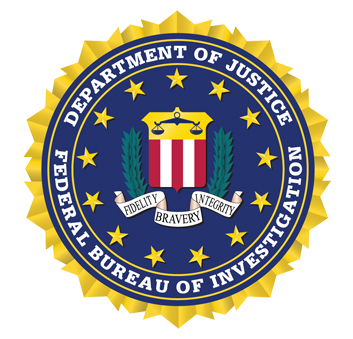

In [137]:
top_ten = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
top_ten

In [141]:
# Set up the Chrome WebDriver with options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without GUI)
driver = webdriver.Chrome(executable_path="C:/Users/rjcol/Herramientas/chromedriver-win64/chromedriver.exe", options=chrome_options)

# Define the URL
url = "https://www.fbi.gov/wanted/topten"

# Open the URL in the browser
driver.get(url)

# Wait for a few seconds for JavaScript to load content (you can adjust the waiting time)
driver.implicitly_wait(20)

# Extract the page source (after JavaScript execution)
page_source = driver.page_source

# Now, you can work with the page source using BeautifulSoup or other parsing libraries
# For example, you can parse the page_source with BeautifulSoup as shown in the previous answer
# and extract the information you need

# Close the WebDriver
driver.quit()


C:\Users\rjcol\AppData\Local\Temp\ipykernel_4708\2492355160.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/Users/rjcol/Herramientas/chromedriver-win64/chromedriver.exe", options=chrome_options)


<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>Security Prompt</title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
<meta content="35" http-equiv="refresh"/>
<script src="/cdn-cgi/challenge-platform/h/b/orchestrate/chl_page/v1?ray=821461045e812147"></script><script async="" crossorigin="anonymous" defer="" src="https://challenges.cloudflare.com/turnstile/v0/b/61b90d1d/api.js?onload=rOnjNn4&amp;render=explicit"></script></head>
<body>
<div class="error_page">

<h1>Additional security has been added
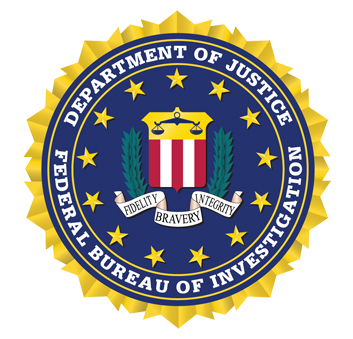

In [143]:
BeautifulSoup(page_source, 'html.parser')

In [129]:
top_ten.find_all('div',{'class': 'focuspoint'})

[]

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [344]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [345]:
earthquakes = BeautifulSoup(requests.get(url).content,'html.parser')
earthquakes

<!DOCTYPE html>

<html lang="en"><head><meta charset="utf-8"/><meta content="srFzNKBTd0FbRhtnzP--Tjxl01NfbscjYwkp4yOWuQY" name="google-site-verification"><meta content="BCAA3C04C41AE6E6AFAF117B9469C66F" name="msvalidate.01"/><meta content="43b36314ccb77957" name="y_key"/><meta content="all" name="robots"/><meta content="Get informed on the latest earthquakes occurred around the globe. earthquakes today - recent and latest earthquakes, earthquake map and earthquake information. Earthquake information for europe. EMSC (European Mediterranean Seismological Centre) provides real time earthquake information for seismic events with magnitude larger than 5 in the European Mediterranean area and larger than 7 in the rest of the world." lang="en" name="description"/><meta content="705855916142039" property="fb:app_id"/><meta content="en_FR" property="og:locale"/><meta content="website" property="og:type"/><meta content="EMSC - European-Mediterranean Seismological Centre" property="og:site_name"

In [217]:
driver_path = "C:/Users/rjcol/Herramientas/chromedriver-win64/chromedriver.exe"

browser = Chrome(executable_path=driver_path)
browser.get(url)

BeautifulSoup(browser.page_source, 'html.parser')

C:\Users\rjcol\AppData\Local\Temp\ipykernel_4708\794157159.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome(executable_path=driver_path)


<html lang="en"><head><meta charset="utf-8"/><meta content="srFzNKBTd0FbRhtnzP--Tjxl01NfbscjYwkp4yOWuQY" name="google-site-verification"/><meta content="BCAA3C04C41AE6E6AFAF117B9469C66F" name="msvalidate.01"/><meta content="43b36314ccb77957" name="y_key"/><meta content="all" name="robots"/><meta content="Get informed on the latest earthquakes occurred around the globe. earthquakes today - recent and latest earthquakes, earthquake map and earthquake information. Earthquake information for europe. EMSC (European Mediterranean Seismological Centre) provides real time earthquake information for seismic events with magnitude larger than 5 in the European Mediterranean area and larger than 7 in the rest of the world." lang="en" name="description"/><meta content="705855916142039" property="fb:app_id"/><meta content="en_FR" property="og:locale"/><meta content="website" property="og:type"/><meta content="EMSC - European-Mediterranean Seismological Centre" property="og:site_name"/><meta content=

In [187]:
columns = pd.DataFrame([[i.string for i in BeautifulSoup(str(eq), 'html.parser').find_all('td')]for eq in earthquakes.find_all('tr')])
earthquakes_df

,0,1,2,3,4,5,6,7,8,9
0,None,None,None,None,None,None,None,None,None,None
1,[Min: ],[[]],[[]],[[]],[[]],[[]],"[[], With:]",[[]],[[]],[[]]
2,[Max: ],[[]],[[]],[[]],"[[], ]",[[]],[],[],[],[]
3,[[Region Name]],"[[], \n, [[<tr><td style=""width:20px;""><input ...",[[]],[[[x]]],None,None,None,None,None,None
4,[[]],[[[x]]],None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None


In [199]:
columns = [i for i in BeautifulSoup(str(earthquakes), 'html.parser').find_all('td')]
columns

[<td>Min: </td>,
 <td><input aria-label="date min" id="datemin" max="2023-11-05" min="2004-10-01" name="datemin" type="date"/></td>,
 <td><input aria-label="magnitude min" id="magmin" max="11" min="0" name="magmin" step="0.1" type="number"/></td>,
 <td><input aria-label="depth min" class="moref" id="depthmin" max="10000" min="-10" name="depthmin" step="1" type="number"/></td>,
 <td><input aria-label="latitude min" class="moref" id="latmin" max="90" min="-90" name="latmin" step="0.001" type="number"/></td>,
 <td class="ic"><input aria-label="longitude min" class="moref" id="lonmin" max="180" min="-180" name="lonmin" step="0.001" type="number"/></td>,
 <td class="moref with"><div class="moref coords-icon" data-maploaded="false"></div>With:</td>,
 <td class="moref"><input aria-label="with reports" id="reports" name="reports" type="checkbox"/></td>,
 <td class="moref"><input aria-label="with medias" id="medias" name="medias" type="checkbox"/></td>,
 <td class="moref"><input aria-label="wit

In [181]:
column_class = [re.findall('class="[^"]*',str(i)) for i in BeautifulSoup(str(earthquakes), 'html.parser').find_all('th')]
target_column_classses = [i.replace('class="','')  for x in column_class[-6:] for i in x]
target_column_classses  

['tbdat', 'tblat', 'tblon', 'tbdep', 'tbmag', 'tbreg']

In [209]:
d = {}
for col in target_column_classses:
    d[col] = [i for i in earthquakes.find_all(data_=col)]
d

{'tbdat': [], 'tblat': [], 'tblon': [], 'tbdep': [], 'tbmag': [], 'tbreg': []}

In [184]:
earthquakes.find_all('tr')


[<tr><th></th><th>Period</th><th>Magnitude</th><th class="moref">Depth</th><th class="moref">Latitude</th><th class="moref">Longitude</th>
 <th class="moref"></th><th class="moref">Reports</th><th class="moref">Images</th><th class="moref">Comments</th>
 </tr>,
 <tr><td>Min: </td><td><input aria-label="date min" id="datemin" max="2023-11-05" min="2004-10-01" name="datemin" type="date"/></td><td><input aria-label="magnitude min" id="magmin" max="11" min="0" name="magmin" step="0.1" type="number"/></td><td><input aria-label="depth min" class="moref" id="depthmin" max="10000" min="-10" name="depthmin" step="1" type="number"/></td>
 <td><input aria-label="latitude min" class="moref" id="latmin" max="90" min="-90" name="latmin" step="0.001" type="number"/></td>
 <td class="ic"><input aria-label="longitude min" class="moref" id="lonmin" max="180" min="-180" name="lonmin" step="0.001" type="number"/></td>
 <td class="moref with"><div class="moref coords-icon" data-maploaded="false"></div>With

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [226]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://api.twitter.com/2/users/AIToolReport/tweets'

In [227]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGB6qwEAAAAAHsb4ELxCajtrSWpmRCNM5tfngSI%3Dm0rQyLcmMxNKs69pB7ZKtQM1GvNCc7Yz1BKSt8XYhqJ5I9aMrQ'
headers = {'Authorization': f'Bearer {bearer_token}'}

BeautifulSoup(requests.get(url,headers=headers).content,'html.parser')

{"client_id":"28015200","detail":"When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.","registration_url":"https://developer.twitter.com/en/docs/projects/overview","title":"Client Forbidden","required_enrollment":"Appropriate Level of API Access","reason":"client-not-enrolled","type":"https://api.twitter.com/2/problems/client-forbidden"}

In [228]:
test_url = 'https://syndication.twitter.com/srv/timeline-profile/screen-name/AIToolReport'

In [232]:
import json
import httpx
from parsel import Selector

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.54 Safari/537.36",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
}


# retrieve embed HTML
with httpx.Client(http2=True, headers=HEADERS) as client:
    response = client.get(
        test_url
    )
    assert response.status_code == 200
sel = Selector(response.text)
# find data cache:
data = json.loads(sel.css("script#__NEXT_DATA__::text").get())
# parse tweet data from data cache JSON:
tweet_data = data["props"]["pageProps"]["timeline"]["entries"]
tweets = [tweet["content"]["tweet"] for tweet in tweet_data]
print(tweets)

[{'id': 0, 'location': '', 'conversation_id_str': '1658055667150733314', 'created_at': 'Mon May 15 10:24:10 +0000 2023', 'display_text_range': [0, 274], 'entities': {'user_mentions': [], 'urls': [], 'hashtags': [], 'symbols': [], 'media': [{'display_url': 'pic.twitter.com/CyS4T7lIAk', 'expanded_url': 'https://twitter.com/AIToolReport/status/1658055667150733314/photo/1', 'id_str': '1658055663040249856', 'indices': [275, 298], 'media_key': '3_1658055663040249856', 'media_url_https': 'https://pbs.twimg.com/media/FwKY1z1WwAASSCi.jpg', 'type': 'photo', 'url': 'https://t.co/CyS4T7lIAk', 'ext_media_availability': {'status': 'Available'}, 'features': {'large': {'faces': []}, 'medium': {'faces': []}, 'small': {'faces': []}, 'orig': {'faces': []}}, 'sizes': {'large': {'h': 1326, 'w': 2048, 'resize': 'fit'}, 'medium': {'h': 777, 'w': 1200, 'resize': 'fit'}, 'small': {'h': 440, 'w': 680, 'resize': 'fit'}, 'thumb': {'h': 150, 'w': 150, 'resize': 'crop'}}, 'original_info': {'height': 1446, 'width': 

In [233]:
tweets_df = pd.DataFrame(tweets)
tweets_df

,id,location,conversation_id_str,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,quote_count,reply_count,retweet_count,retweeted,text,user,in_reply_to_name,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str
0,0,,1658055667150733314,Mon May 15 10:24:10 +0000 2023,"[0, 274]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/Cy...,4378,False,Kids are making $15K/month with ChatGPT.\n\nBu...,...,150,5405,4402,False,Kids are making $15K/month with ChatGPT.\n\nBu...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
1,0,,1662481361079238659,Sat May 27 15:30:18 +0000 2023,"[0, 283]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/B2...,818,False,ChatGPT is a FREE money-making machine\n\nBut ...,...,15,664,530,False,ChatGPT is a FREE money-making machine\n\nBut ...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
2,0,,1673352993159168008,Mon Jun 26 15:30:17 +0000 2023,"[0, 274]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/5M...,663,False,Kids are making $15K/month with ChatGPT.\n\nBu...,...,28,960,787,False,Kids are making $15K/month with ChatGPT.\n\nBu...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
3,0,,1692847933580890158,Sat Aug 19 10:36:13 +0000 2023,"[0, 271]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/88...,568,False,ChatGPT is a FREE money-printer.\n\nBut most p...,...,8,1385,109,False,ChatGPT is a FREE money-printer.\n\nBut most p...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
4,0,,1682752487818924032,Sat Jul 22 14:00:31 +0000 2023,"[0, 271]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/KT...,547,False,ChatGPT is a FREE money-printer.\n\nBut most p...,...,6,1187,123,False,ChatGPT is a FREE money-printer.\n\nBut most p...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,,1669712762858270720,Fri Jun 16 14:25:19 +0000 2023,"[0, 160]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/6u...,118,False,"AI Tool Report just hit 100,000 newsletter sub...",...,3,31,23,False,"AI Tool Report just hit 100,000 newsletter sub...","{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
95,0,,1710611847534067875,Sat Oct 07 11:03:40 +0000 2023,"[0, 278]","{'user_mentions': [], 'urls': [], 'hashtags': ...",NaN,118,False,ChatGPT isn't going to replace your job.\n\nIt...,...,1,21,16,False,ChatGPT isn't going to replace your job.\n\nIt...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
96,0,,1641551003735711746,Thu Mar 30 21:20:32 +0000 2023,"[0, 241]","{'user_mentions': [], 'urls': [], 'hashtags': ...",{'media': [{'display_url': 'pic.twitter.com/FW...,105,False,Goldman Sachs just released a SHOCKING paper o...,...,4,19,43,False,Goldman Sachs just released a SHOCKING paper o...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN
97,0,,1704178292226482456,Tue Sep 19 16:59:01 +0000 2023,"[0, 123]","{'user_mentions': [], 'urls': [], 'hashtags': ...",NaN,116,False,Build a Wordpress Website with ChatGPT in 7 Ea...,...,0,20,18,False,Build a Wordpress Website with ChatGPT in 7 Ea...,"{'blocking': False, 'created_at': 'Mon Mar 20 ...",NaN,NaN,NaN,NaN


#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [298]:

# Twitter username of the account you want to scrape
username = "AIToolReport"

# URL of the Twitter profile page
url = f"https://twitter.com/{username}"

# Send an HTTP GET request to the Twitter profile page
response = requests.get(url)
BeautifulSoup(response.content)

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/><link href="//abs.twimg.com" rel="preconnect"/><link href="//abs.twimg.com" rel="dns-prefetch"/><link href="//api.twitter.com" rel="preconnect"/><link href="//api.twitter.com" rel="dns-prefetch"/><link href="//pbs.twimg.com" rel="preconnect"/><link href="//pbs.twimg.com" rel="dns-prefetch"/><link href="//t.co" rel="preconnect"/><link href="//t.co" rel="dns-prefetch"/><link href="//video.twimg.com" rel="preconnect"/><link href="//video.twimg.com" rel="dns-prefetch"/><link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.5493c32a.js" nonce="ZjdhYWZkMzktNTdjMi00Nzk3LWJlNWQtMzcxZDIyNjJhYjRi" rel="preload"/><link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendor.604fdeba.js" nonce="ZjdhYWZk

#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [242]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [295]:
wiki = BeautifulSoup(requests.get(url).content, 'html.parser')

In [296]:
main_languages = {}
for lan in wiki.find_all('div', {'class':True,'lang':True,'dir':'ltr'}):
    main_languages[lan.find_all('strong')[0].string] = '.'.join(re.findall('\d+',lan.find_all('bdi')[0].string)) + '+ ' + lan.find_all('span')[0].string
main_languages

{'English': '6.715.000+ articles',
 '日本語': '1.387.000+ 記事',
 'Español': '1.892.000+ artículos',
 'Русский': '1.938.000+ статей',
 'Deutsch': '2.836.000+ Artikel',
 'Français': '2.553.000+ articles',
 'Italiano': '1.826.000+ voci',
 '中文': '1.377.000+ 条目 / 條目',
 'Português': '1.109.000+ artigos'}

#### A list with the different kind of datasets available in data.gov.uk.

In [299]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [301]:
gov_data = BeautifulSoup(requests.get(url).content, 'html.parser')

In [302]:
topics = [i.string for i in gov_data.find_all('h3', {'class': 'govuk-heading-s dgu-topics__heading'})]
topics

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [303]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [304]:
wikilan = BeautifulSoup(requests.get(url).content, 'html.parser')

In [342]:
lan_list = [[i.string for i in wikilan.find_all('table')[0].find_all('th')]]
lan_list[0][1] = "Native Speakers"
for row in wikilan.find_all('table')[0].find_all('tr')[1:]:
    lan_list.append([row.find_all('a')[0].string, row.find_all('td')[1].string.replace('\n',''), row.find_all('a')[-2].string, row.find_all('a')[-1].string ])
lan_df = pd.DataFrame(lan_list)
lan_df.head(10)


,0,1,2,3
0,Language\n,Native Speakers,Language family\n,Branch\n
1,Mandarin Chinese,939,Sino-Tibetan,Sinitic
2,Spanish,485,Indo-European,Romance
3,English,380,Indo-European,Germanic
4,Hindi,345,Indo-European,Indo-Aryan
5,Portuguese,236,Indo-European,Romance
6,Bengali,234,Indo-European,Indo-Aryan
7,Russian,147,Indo-European,Balto-Slavic
8,Japanese,123,Japonic,Japanese
9,Yue Chinese,86.1,Sino-Tibetan,Sinitic


## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here